## Graduation-Project - End to End Machine Learning Project
<i>Welcome to <b>Palestine Car Price Prediction Machine Learning Projects.</b>! Our task is to predict a price for any car  in Palestone Country, given a number of features from our Country.</i>

<i>This notebook contains all the Steps for genrating our Machine Learning project.</i>

* for More details about Data and Cleaning process you can Visit our GitHub Repostry --> __[Graduation_project
](https://github.com/akramAssi/graduation_projects)__ 

* also you Can Fork our Mobile Application in This Repostry --> __[SOUQY
](https://github.com/akramAssi/souqy)__ 




# Setup
First, let's import all needed modules,

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import xticks
from IPython.display import display
from missingpy import MissForest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import sklearn.metrics as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR



/Users/macbookpro/Documents/naser_python/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load and Understand The Data

In [3]:
excel_Path = os.path.join("/Users/macbookpro/Desktop/For Graduation/FinalData","Complete.xlsx")
MyData = pd.read_excel(excel_Path)
MyData

,make,model,type,passenger,year,price,color,fuel,history,gear,...,url,alarm,ac,radio_cd,sunroof,leatherـchair,centralـLock,magnesium_wheels,air_bag,Days_Live
0,Volkswagen,Passat,sedan,5,1999,28500,dark blue,petrol,private,automatic,...,https://shobiddak.com/cars/432099,1,1,0,1,0,1,0,0,6472
1,Volkswagen,Passat,sedan,5,2001,43000,gray,petrol,private,automatic,...,https://shobiddak.com/cars/432100,1,1,1,0,0,1,0,1,5741
2,hyundai,Accent,sedan,5,2014,68000,white,petrol,private,automatic,...,https://shobiddak.com/cars/432104,1,1,1,0,1,1,1,1,993
3,kia,Pride(rio),__sedan/hatch__,5,2008,49000,silver,diesel,private,manual,...,https://shobiddak.com/cars/432105,1,1,1,0,0,1,1,1,3185
4,BMW,3 Series,sedan,5,1986,30000,blue,petrol,private,manual,...,https://shobiddak.com/cars/432107,1,0,1,1,1,1,1,0,11219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200460,Mercedes,Vario,truck,7,1996,70000,white,diesel,Commercial,manual,...,https://shobiddak.com/cars/517019,0,1,1,0,1,1,0,0,7985
200461,Mercedes,C-Class,sedan,5,2002,50000,brown,diesel,taxi,automatic,...,https://shobiddak.com/cars/679985,0,1,1,0,1,1,1,1,7184
200462,Mercedes,Sprinter,van,7,1989,25000,white,diesel,private,manual,...,https://shobiddak.com/cars/570091,0,0,0,0,0,0,0,0,10860
200463,Mercedes,Atego,truck,3,1996,85000,white,diesel,Commercial,manual,...,https://shobiddak.com/cars/463031,1,1,1,1,0,1,0,0,7853


In [4]:
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200465 entries, 0 to 200464
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   make              200465 non-null  object 
 1   model             200465 non-null  object 
 2   type              200465 non-null  object 
 3   passenger         200465 non-null  int64  
 4   year              200465 non-null  int64  
 5   price             200465 non-null  int64  
 6   color             200465 non-null  object 
 7   fuel              200465 non-null  object 
 8   history           200465 non-null  object 
 9   gear              200465 non-null  object 
 10  engine_size       200465 non-null  object 
 11  Kilometers        117422 non-null  float64
 12  owners            149417 non-null  float64
 13  ad_date           200465 non-null  object 
 14  payment_method    200465 non-null  object 
 15  windows           200465 non-null  object 
 16  url               20

### from the previous block we Notice that:
* The Totall Number of Data is 200479 and the Totall number of Features is 26
* The Data is contain both Categorial and numeric value
* thers Some Missing Data in Some Column (Kilometers,owners)
* There's Some Dtype for some column(engine_size,owners,km) needed to change ---> `Note: This step will be delayed until we Fill the Missing Data`
  
  
  
  

##### `So based in This Information we will Do some Preparation on Data To be Ready`

  * Create a invidual copy from Data
  * Delete Some unncessary Column
  * As a step for prepare Categrical Data before Visualize and use it we Make a string in each column with one Format and delete the space by strip( )
    * `For example "BMW and bmw" must be One World`
  * Visulaize Categorical Data before encoded
  * After Visualize Categorical Data we must deal with Numeric Data and solve all problem on it
  * As a step for prepare Numeric Data before Visualize and use it we Must deal with Numeric Missing Data and Fill it
  * Correct wrong dtype  
  
<b>Lets Start with Categorical Data,</b> 

In [5]:
CopyData = MyData.copy()

In [6]:
MyData.pop("ad_date")
MyData.pop("url")

0         https://shobiddak.com/cars/432099
1         https://shobiddak.com/cars/432100
2         https://shobiddak.com/cars/432104
3         https://shobiddak.com/cars/432105
4         https://shobiddak.com/cars/432107
                        ...                
200460    https://shobiddak.com/cars/517019
200461    https://shobiddak.com/cars/679985
200462    https://shobiddak.com/cars/570091
200463    https://shobiddak.com/cars/463031
200464    https://shobiddak.com/cars/481989
Name: url, Length: 200465, dtype: object

##### `1. Make Column`

In [7]:
print("Number of Uniqe Data in Make Column Before Edit: ",len(MyData.make.unique()))
MyData.make = MyData.make.str.lower()
MyData.make = MyData.make.str.strip()
MyData.make.unique()
print("Number of Uniqe Data in Make Column After Edit: ",len(MyData.make.unique()))

Number of Uniqe Data in Make Column Before Edit:  84
Number of Uniqe Data in Make Column After Edit:  65


#### `2. Model Column`

In [8]:
print("Number of Uniqe Data in Model Column Before Edit: ",len(MyData.model.unique()))
MyData.model = MyData.model.str.lower()
MyData.model = MyData.model.str.strip()
MyData.model.unique()
print("Number of Uniqe Data in Model Column After Edit: ",len(MyData.model.unique()))

Number of Uniqe Data in Model Column Before Edit:  618
Number of Uniqe Data in Model Column After Edit:  562


#### `3. Type Column`

In [9]:
print("Number of Uniqe Data in Type Column Before Edit: ",len(MyData.type.unique()))
MyData.type = MyData.type.str.lower()
MyData.type = MyData.type.str.strip()
MyData.type.unique()
print("Number of Uniqe Data in Type Column After Edit: ",len(MyData.type.unique()))

Number of Uniqe Data in Type Column Before Edit:  19
Number of Uniqe Data in Type Column After Edit:  13


#### `4. Color Column`

In [10]:
print("Number of Uniqe Data in Color Column Before Edit: ",len(MyData.color.unique()))
MyData.color = MyData.color.str.lower()
MyData.color = MyData.color.str.strip()
MyData.color.unique()
print("Number of Uniqe Data in Color Column After Edit: ",len(MyData.color.unique()))

Number of Uniqe Data in Color Column Before Edit:  18
Number of Uniqe Data in Color Column After Edit:  15


#### `5. History Column`


In [11]:
print("Number of Uniqe Data in History Column Before Edit: ",len(MyData.history.unique()))
MyData.history = MyData.history.str.lower()
MyData.history = MyData.history.str.strip()
MyData.history.unique()
print("Number of Uniqe Data in History Column After Edit: ",len(MyData.history.unique()))

Number of Uniqe Data in History Column Before Edit:  7
Number of Uniqe Data in History Column After Edit:  6


#### `6. Gear-Type Column`


In [12]:
print("Number of Uniqe Data in Gear-Type Column Before Edit: ",len(MyData.gear.unique()))
MyData.gear = MyData.gear.str.lower()
MyData.gear = MyData.gear.str.strip()
MyData.gear.unique()
print("Number of Uniqe Data in Gear-Type Column After Edit: ",len(MyData.gear.unique()))

Number of Uniqe Data in Gear-Type Column Before Edit:  3
Number of Uniqe Data in Gear-Type Column After Edit:  2


#### `7. Payment-Method Column`

In [13]:
print("Number of Uniqe Data in Payment-Method Column Before Edit: ",len(MyData.payment_method.unique()))
MyData.payment_method = MyData.payment_method.str.lower()
MyData.payment_method = MyData.payment_method.str.strip()
MyData.payment_method.unique()
print("Number of Uniqe Data in Payment-Method Column Before Edit: ",len(MyData.payment_method.unique()))

Number of Uniqe Data in Payment-Method Column Before Edit:  3
Number of Uniqe Data in Payment-Method Column Before Edit:  2


#### `8. Fuel-Type Column`

In [14]:
print("Number of Uniqe Data in fuel-Type Column Before Edit: ",len(MyData.fuel.unique()))
MyData.fuel = MyData.fuel.str.lower()
MyData.fuel = MyData.fuel.str.strip()
MyData.fuel.unique()
print("Number of Uniqe Data in fuel-Type Column After Edit: ",len(MyData.fuel.unique()))

Number of Uniqe Data in fuel-Type Column Before Edit:  3
Number of Uniqe Data in fuel-Type Column After Edit:  3


#### `8. Window Column`

In [15]:
print("Number of Uniqe Data in windows Column Before Edit: ",len(MyData.windows.unique()))
MyData.windows = MyData.windows.str.lower()
MyData.windows = MyData.windows.str.strip()
MyData.windows.unique()
print("Number of Uniqe Data in windows Column After Edit: ",len(MyData.windows.unique()))

Number of Uniqe Data in windows Column Before Edit:  2
Number of Uniqe Data in windows Column After Edit:  2


# Visualizing the data

##### `Now Data was ready, we can do a graphical representation on it to see its behaviour`
* Note: Visulaizing is common for 2 different way:
   * Visualising Categorical Data
   * Visualising Numaric Data `Note: This step will be delayed until we Fill the Missing Data`
   
lets start visulaize The Categorical Data:
 * Make
 * Model
 * type
 * Color
 * Fuel
 * History
 * Gear
 * payment_method
 * windows
 
##### `Define a List Containe Color for plotes to be changed as you wnat`  

In [16]:
MyColor = ['dodgerblue', 'darkorange', 'forestgreen', 'crimson'
           ,'orchid','saddlebrown','pink','gray','y','c','powderblue']

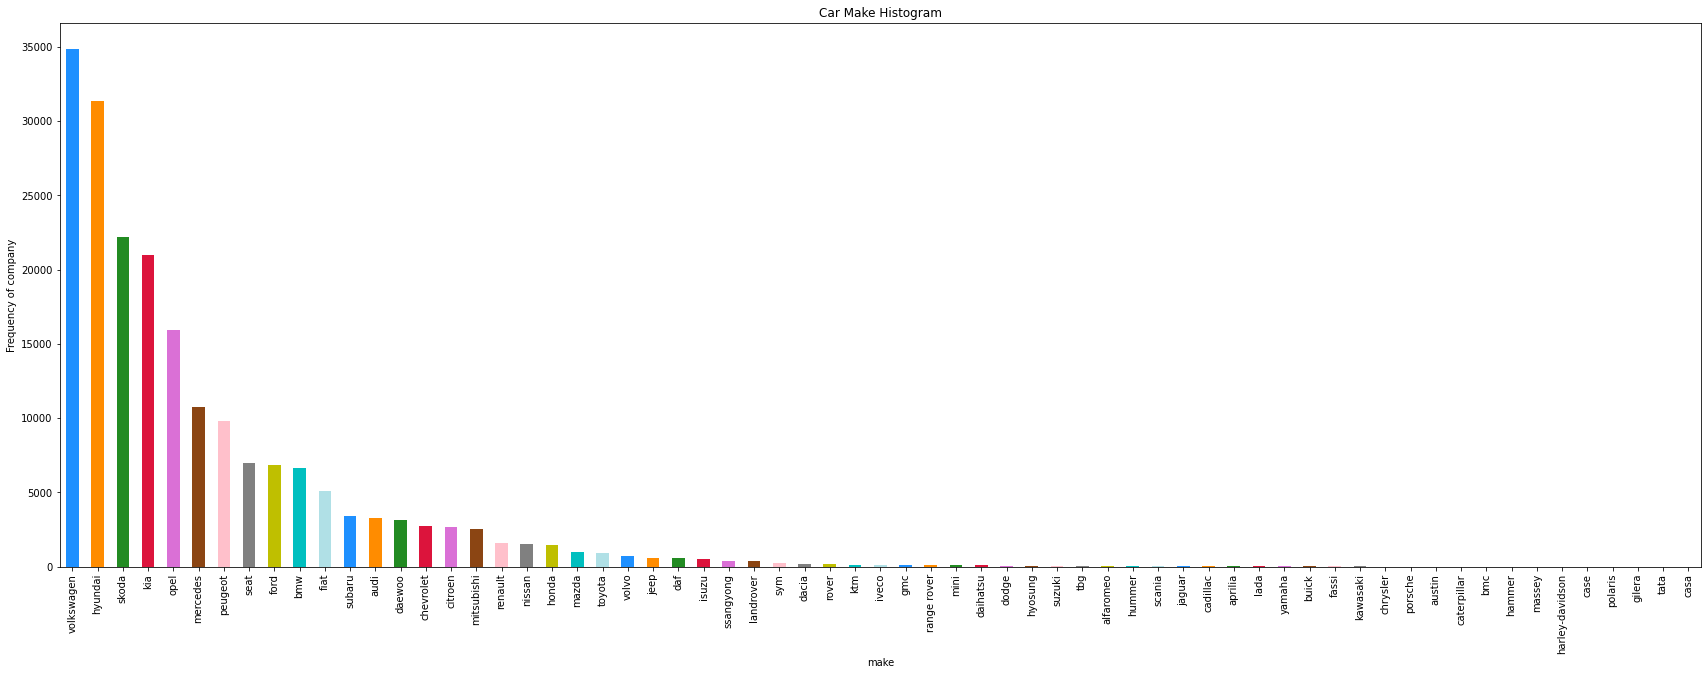

In [17]:
plt.figure(figsize=(100,10))

plt.subplot(1,3,1)
plt1 = MyData.make.value_counts().plot(kind='bar',color=MyColor)
plt.title('Car Make Histogram')
plt1.set(xlabel = 'make', ylabel='Frequency of company')

plt.show()

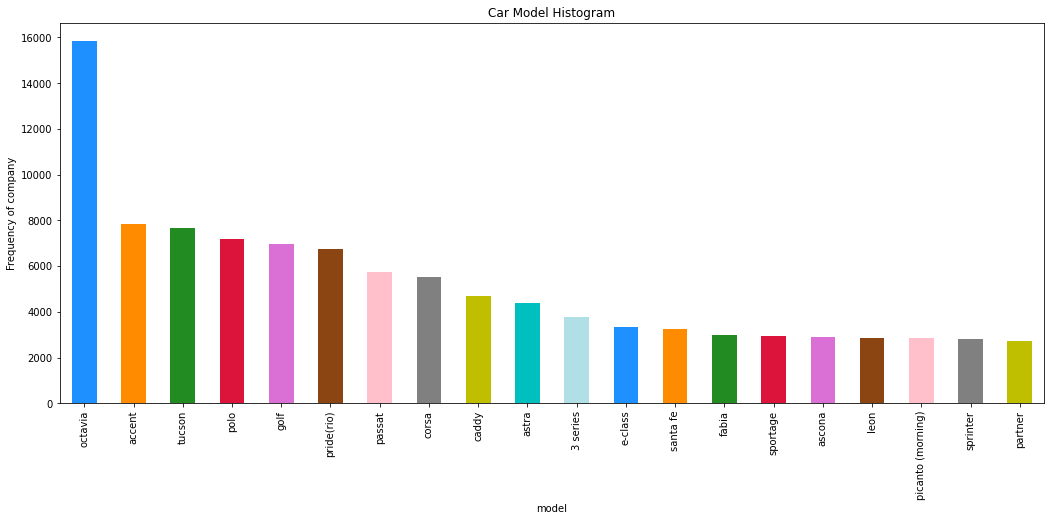

In [18]:
    plt.figure(figsize=(60,7))

plt.subplot(1,3,1)
plt1 = MyData.model.value_counts().nlargest(n=20, keep='first').plot(kind='bar',color=MyColor)
plt.title('Car Model Histogram')
plt1.set(xlabel = 'model', ylabel='Frequency of company')


plt.show()


[Text(0.5, 0, 'Type'), Text(0, 0.5, 'Frequency of Car Type')]

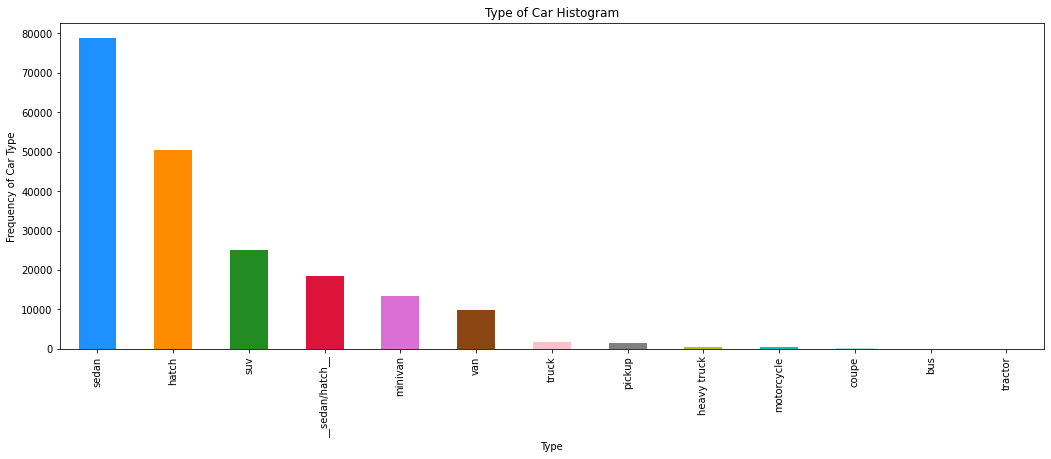

In [19]:
plt.figure(figsize=(60,6))
plt.subplot(1,3,1)
plt1 = MyData.type.value_counts().plot(kind='bar',color=MyColor)
plt.title('Type of Car Histogram')
plt1.set(xlabel = 'Type', ylabel='Frequency of Car Type')

[Text(0.5, 0, 'windows'), Text(0, 0.5, 'Frequency of gear')]

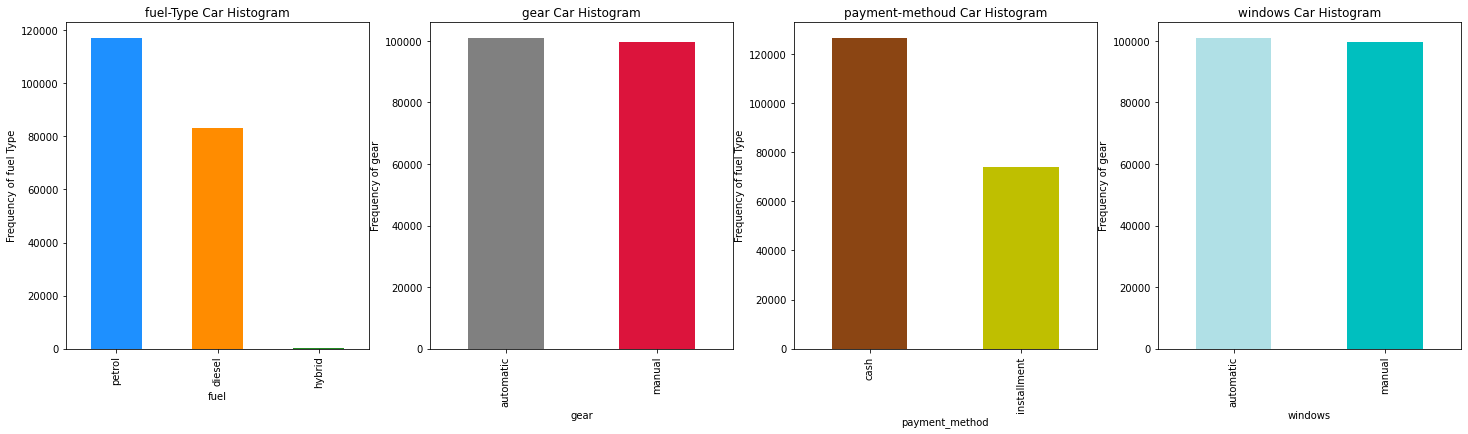

In [20]:
plt.figure(figsize=(25, 6))

plt.subplot(1,4,1)
plt1 = MyData.fuel.value_counts().plot(kind='bar',color = MyColor)
plt.title('fuel-Type Car Histogram')
plt1.set(xlabel = 'fuel', ylabel='Frequency of fuel Type')


plt.subplot(1,4,2)
plt1 = MyData.gear.value_counts().plot(kind='bar',color = ['gray','crimson'])
plt.title('gear Car Histogram')
plt1.set(xlabel = 'gear', ylabel='Frequency of gear')


plt.subplot(1,4,3)
plt1 = MyData.payment_method.value_counts().plot(kind='bar',color = ['saddlebrown','y'])
plt.title('payment-methoud Car Histogram')
plt1.set(xlabel = 'payment_method', ylabel='Frequency of fuel Type')


plt.subplot(1,4,4)
plt1 = MyData.gear.value_counts().plot(kind='bar',color = ['powderblue','c'])
plt.title('windows Car Histogram')
plt1.set(xlabel = 'windows', ylabel='Frequency of gear')



[Text(0.5, 0, 'Color'), Text(0, 0.5, 'Frequency of Color')]

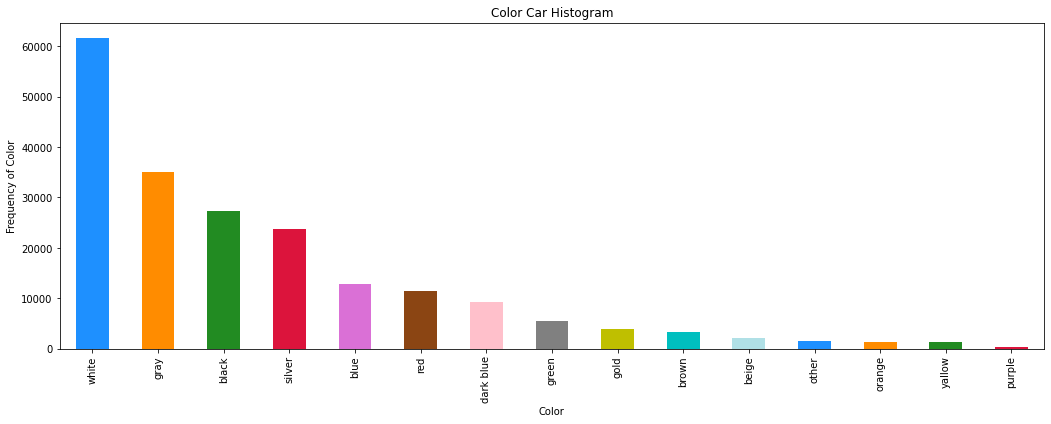

In [21]:
plt.figure(figsize=(60,6))

plt.subplot(1,3,1)
plt1 = MyData.color.value_counts().plot(kind='bar',color = MyColor)
plt.title('Color Car Histogram')
plt1.set(xlabel = 'Color', ylabel='Frequency of Color')

## Now Before we deal,Visualize Numeric Data we must imput Numeric Missing Data

Thers a lot of different Techniqe that can we used to fill the Missing data:
* Median imputation
* Mean imputation
* Mode imputation
* MissForest imputation

<b> Note: Documantion contain the Comparesion between all imputations </b>

###### ` So after applay all previous Techniqe , we Notice That MissForest will give the best imputation and less MAE`
######  <b>To applay the MissForest Techniqe , Theres Some conditions we must do the most important thing that Categorical Data must be encoded</b>
So lets start applaying this Methoud:
* Firstly, we must applay Encoded Techniqe in Categorical Data.
* Secandly,we Must split the Target value from the Data to avoid Data Leakage problem
* Thirdly we perform the imputation in all Data. Then we create a new columns to use this imputation to fill Missing Data on it.
* Finally, we Delete The the Columns that contines Missing Data

In [22]:
def dummies(x,df):
    temp = pd.get_dummies(df[x])
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applaying Function in MyData
MyData = dummies('make',MyData)
MyData = dummies('model',MyData)
MyData = dummies('type',MyData)
MyData = dummies('color',MyData)
MyData = dummies('fuel',MyData)
MyData = dummies('history',MyData)
MyData = dummies('gear',MyData)
MyData = dummies('payment_method',MyData)
MyData = dummies('windows',MyData)

In [23]:
MyData.shape

(200465, 684)

###### <b> Notice That Data Now was Encoded Successfully and now contain 775 column </b>

In [24]:
MyData

,passenger,year,price,engine_size,Kilometers,owners,alarm,ac,radio_cd,sunroof,...,private,rental,school,taxi,automatic,manual,cash,installment,electric,windm
0,5,1999,28500,1600,NaN,NaN,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
1,5,2001,43000,1600,100000.0,2.0,1,1,1,0,...,1,0,0,0,1,0,1,0,1,0
2,5,2014,68000,1500,45000.0,0.0,1,1,1,0,...,1,0,0,0,1,0,1,0,0,1
3,5,2008,49000,1500,NaN,NaN,1,1,1,0,...,1,0,0,0,0,1,1,0,1,0
4,5,1986,30000,1600,NaN,10.0,1,0,1,1,...,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200460,7,1996,70000,110,NaN,4.0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,1
200461,5,2002,50000,2200,NaN,NaN,0,1,1,0,...,0,0,0,1,1,0,0,1,1,0
200462,7,1989,25000,3000,NaN,1.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
200463,3,1996,85000,170,NaN,4.0,1,1,1,1,...,0,0,0,0,0,1,1,0,0,1


###### Now we must Split Target Column(price) from hole Data 

In [25]:
Target = MyData.pop('price')
MyData

,passenger,year,engine_size,Kilometers,owners,alarm,ac,radio_cd,sunroof,leatherـchair,...,private,rental,school,taxi,automatic,manual,cash,installment,electric,windm
0,5,1999,1600,NaN,NaN,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
1,5,2001,1600,100000.0,2.0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
2,5,2014,1500,45000.0,0.0,1,1,1,0,1,...,1,0,0,0,1,0,1,0,0,1
3,5,2008,1500,NaN,NaN,1,1,1,0,0,...,1,0,0,0,0,1,1,0,1,0
4,5,1986,1600,NaN,10.0,1,0,1,1,1,...,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200460,7,1996,110,NaN,4.0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,1
200461,5,2002,2200,NaN,NaN,0,1,1,0,1,...,0,0,0,1,1,0,0,1,1,0
200462,7,1989,3000,NaN,1.0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
200463,3,1996,170,NaN,4.0,1,1,1,1,0,...,0,0,0,0,0,1,1,0,0,1


In [26]:
%%time
# Make an instance and perform the imputation
imputer = MissForest()
X_imputed = imputer.fit_transform(MyData)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
CPU times: user 5h 34min 4s, sys: 1min 31s, total: 5h 35min 36s
Wall time: 32min 1s


In [27]:
# Add imputed values as columns to the untouched dataset
MyData['MF_kilometers'] = X_imputed[:, 3]
MyData['MF_owners'] = X_imputed[:, 4]

In [28]:
print(MyData[['Kilometers', 'MF_kilometers','owners','MF_owners']])

        Kilometers  MF_kilometers  owners  MF_owners
0              NaN      127526.87     NaN       2.61
1         100000.0      100000.00     2.0       2.00
2          45000.0       45000.00     0.0       0.00
3              NaN      132237.81     NaN       2.57
4              NaN      114170.99    10.0      10.00
...            ...            ...     ...        ...
200460         NaN      203830.79     4.0       4.00
200461         NaN      163030.59     NaN       3.97
200462         NaN      106654.37     1.0       1.00
200463         NaN      443246.16     4.0       4.00
200464    300000.0      300000.00     NaN       1.52

[200465 rows x 4 columns]


In [29]:
# Now we Can Delete (Kilometers,owners) Columns , Since theres 2 alternative Column
MyData.drop("Kilometers",axis=1,inplace=True)
MyData.drop("owners",axis=1,inplace=True)

###### ` just only remains for us is to Convert Dtype for the specified columns(engine_size,MF_owners,MF_kilometers)` 

In [30]:
MyData["engine_size"] = MyData["engine_size"].astype("int64")
MyData["MF_kilometers"] = MyData["MF_kilometers"].astype("int64")
MyData["MF_owners"] = MyData["MF_owners"].astype("int64")
MyData["passenger"] = MyData["passenger"].astype("int64")

In [31]:
MyData

,passenger,year,engine_size,alarm,ac,radio_cd,sunroof,leatherـchair,centralـLock,magnesium_wheels,...,school,taxi,automatic,manual,cash,installment,electric,windm,MF_kilometers,MF_owners
0,5,1999,1600,1,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,127526,2
1,5,2001,1600,1,1,1,0,0,1,0,...,0,0,1,0,1,0,1,0,100000,2
2,5,2014,1500,1,1,1,0,1,1,1,...,0,0,1,0,1,0,0,1,45000,0
3,5,2008,1500,1,1,1,0,0,1,1,...,0,0,0,1,1,0,1,0,132237,2
4,5,1986,1600,1,0,1,1,1,1,1,...,0,0,0,1,1,0,1,0,114170,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200460,7,1996,110,0,1,1,0,1,1,0,...,0,0,0,1,1,0,0,1,203830,4
200461,5,2002,2200,0,1,1,0,1,1,1,...,0,1,1,0,0,1,1,0,163030,3
200462,7,1989,3000,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,106654,1
200463,3,1996,170,1,1,1,1,0,1,0,...,0,0,0,1,1,0,0,1,443246,4



### Now The Data was Encoded and The Missing was imputaed We can visulaizeing The Numeric Data without any problem:
lets Start:
* Target Column (price)
* year Car produce
* previous owners for the Car
* number of passenger in the car
* engine size
* Kilometers that car run


/Users/macbookpro/Documents/naser_python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


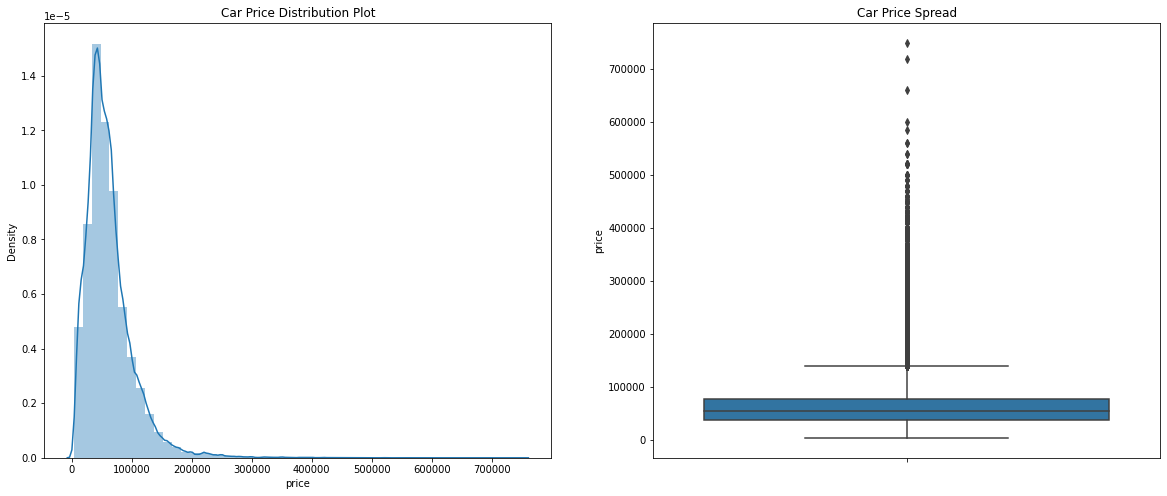

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(Target)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=Target)

plt.show()

/Users/macbookpro/Documents/naser_python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbookpro/Documents/naser_python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


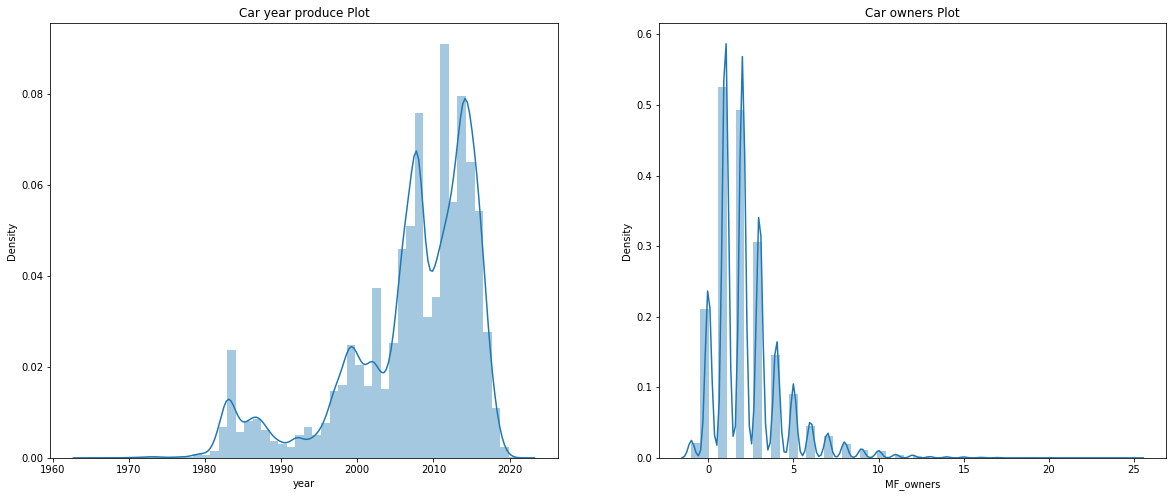

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car year produce Plot')
sns.distplot(MyData.year)


plt.subplot(1,2,2)
plt.title('Car owners Plot')
sns.distplot(MyData.MF_owners)

plt.show()

/Users/macbookpro/Documents/naser_python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbookpro/Documents/naser_python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


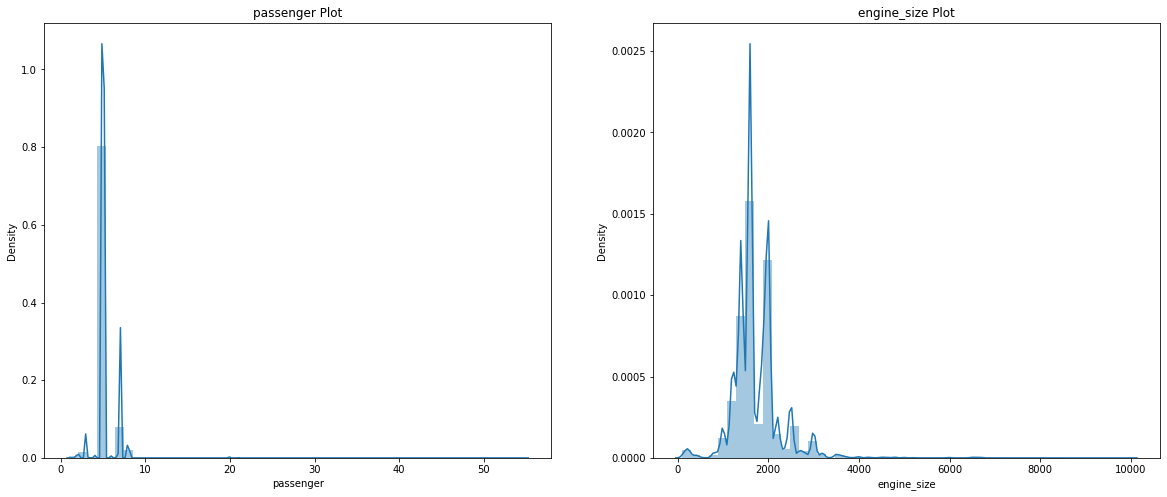

In [34]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('passenger Plot')
sns.distplot(MyData.passenger)


plt.subplot(1,2,2)
plt.title('engine_size Plot')
sns.distplot(MyData.engine_size)

plt.show()

/Users/macbookpro/Documents/naser_python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


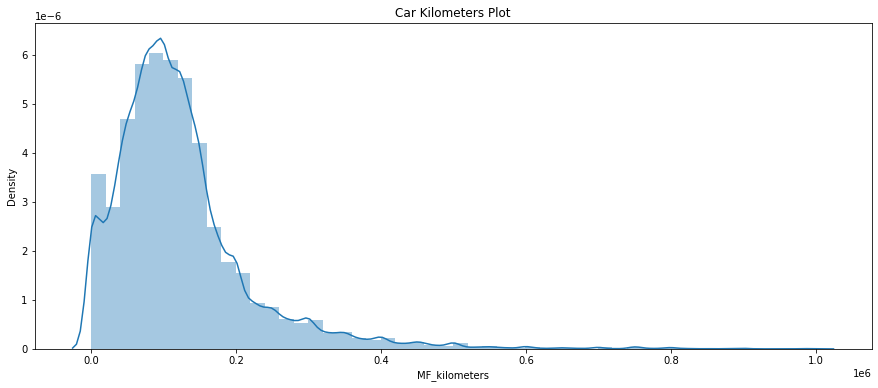

In [35]:
plt.figure(figsize=(15, 6))

plt.title('Car Kilometers Plot')
sns.distplot(MyData.MF_kilometers)

plt.show()


##### `Inference from previous plots`

* The price plot seemed That the most prices in Data are low(between <b>(20,000 and 100,000)</b>) with some car above and below

* The year plot seemed That the most car in Data are low(between <b>(2005 and 2017)</b>) with some car above and below

* The owners plot seemed That the most previous owners for the car in Data is about <b> 2 </b>

* The passenger plot seemed That the most capacity passenger for the car in Data is about <b> 5 </b>

* The engine_size plot seemed That the most engine_size for the car in Data are low(between <b>(1000 and 1700)</b>)


#### `important Note and explantion`
* in Kilometers plot:
  * the y-axis is standard scientific notion, so if there's a 0.2 on the y-axis and a 1e6 at the top, the value for 0.2 actually indicates 0.2*1e6 = 0.2 * 10^6 = 200,000.
  
  * from the previous Note , The Kilometers plot seemed That the most car in Data are run about <b> 100,000 Km </b>
  * Theres Some car run more than <b>500000km</b> ---> its all Taxi and Commerical



# Do Some Statistics on Data to gain insights before Use it

* combine price column with all features to :
   * find the corrolation between all features with price 
   * Visulaize the Plot between all features with price 
   * get some Statiecs on Data

In [36]:
MyData.reset_index(drop=True, inplace=True)
Target.reset_index(drop=True, inplace=True)

Data = pd.concat([MyData, Target], axis=1)

In [37]:
Data

,passenger,year,engine_size,alarm,ac,radio_cd,sunroof,leatherـchair,centralـLock,magnesium_wheels,...,taxi,automatic,manual,cash,installment,electric,windm,MF_kilometers,MF_owners,price
0,5,1999,1600,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,127526,2,28500
1,5,2001,1600,1,1,1,0,0,1,0,...,0,1,0,1,0,1,0,100000,2,43000
2,5,2014,1500,1,1,1,0,1,1,1,...,0,1,0,1,0,0,1,45000,0,68000
3,5,2008,1500,1,1,1,0,0,1,1,...,0,0,1,1,0,1,0,132237,2,49000
4,5,1986,1600,1,0,1,1,1,1,1,...,0,0,1,1,0,1,0,114170,10,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200460,7,1996,110,0,1,1,0,1,1,0,...,0,0,1,1,0,0,1,203830,4,70000
200461,5,2002,2200,0,1,1,0,1,1,1,...,1,1,0,0,1,1,0,163030,3,50000
200462,7,1989,3000,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,106654,1,25000
200463,3,1996,170,1,1,1,1,0,1,0,...,0,0,1,1,0,0,1,443246,4,85000


In [38]:
Corr_matrix = Data.corr()
Corr_matrix["price"].sort_values(ascending = False)

price        1.000000
year         0.555836
suv          0.405053
sunroof      0.360855
automatic    0.332370
               ...   
petrol      -0.293347
windm       -0.300042
manual      -0.332370
MF_owners   -0.445284
Days_Live   -0.562191
Name: price, Length: 684, dtype: float64

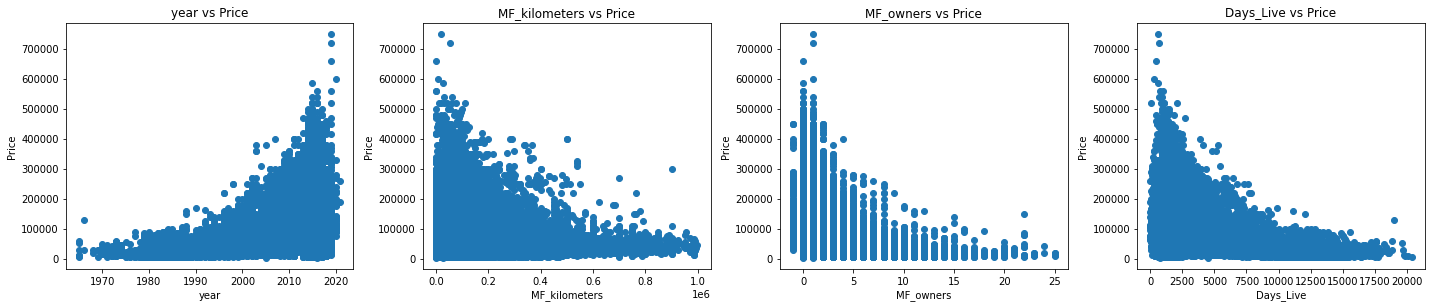

In [39]:
def scatter(x,fig):
    plt.subplot(5,4,fig)
    plt.scatter(Data[x],Data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)
    
    
plt.figure(figsize=(20,20))

scatter('year', 1)
scatter('MF_kilometers', 2)
scatter('MF_owners', 3)
scatter('Days_Live', 4)



plt.tight_layout()    

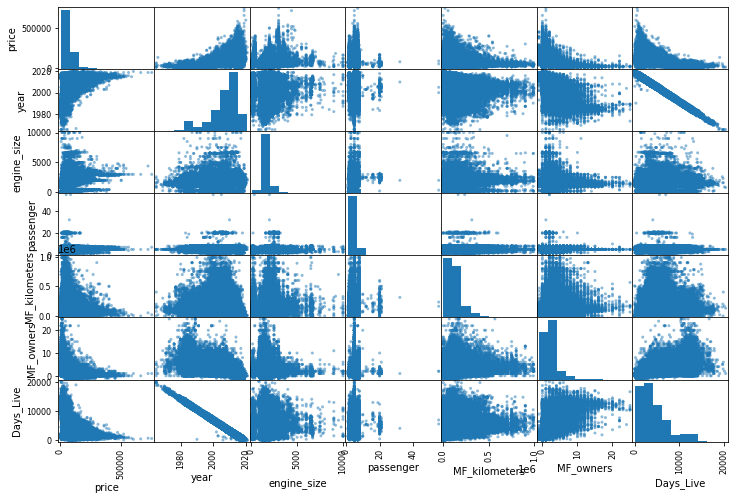

In [40]:
# Corrolation plot between some numeric columns
from pandas.plotting import scatter_matrix

attributes = ["price","year","engine_size","passenger","MF_kilometers","MF_owners","Days_Live"]
scatter_matrix(Data[attributes], figsize=(12, 8))
plt.show()

#### Now we Must prepare Dataset For applaying in Machin learning Model according to this Steps(Split and Normalization)

* Split the Dataset into 2 part train_set and test_set

* Data is not normally distributed so we will use Normalization
* Theres Some Machine learning Model insenstive for <b>Normalization</b> and theres Senstive so we will cerate:
  * a non Normalization Dataset <b>(df_train & df_test )</b>
     *  `split into X_train , Y_train , X_test , Y_test `
  * a Normalization Dataset <b>(df_train_norm & df_test_norm)</b>
     *  `split into X_train_Norm , Y_train_Norm , X_test_Norm , Y_test_Norm `
  
<b> then we applay suitable Dataset with its Correct Model </b>

lets start Split the Data ...

In [41]:
# We Split The Data into 2 sets (train,test)
df_train, df_test = train_test_split(Data, train_size = 0.8, test_size = 0.2, random_state = 42)
print("The len of the Train_set size is ---->",len(df_train))
print("The len of the Test_set size is ---->",len(df_test))

The len of the Train_set size is ----> 160372
The len of the Test_set size is ----> 40093


In [42]:
# df_train_norm = df_train.copy()
# df_test_norm = df_test.copy()
# print("Copy Train_set size is(",len(df_train_norm),") and Copy Test_set size is (",len(df_test_norm),")")
# print("This 2 copys will used to Normalization as follow")

In [43]:
Y_train = df_train.pop('price')
X_train = df_train

Y_test = df_test.pop('price')
X_test = df_test

In [44]:
# scaler = MinMaxScaler()
# num_vars = ['passenger','year','price','engine_size','MF_kilometers','MF_owners','Days_Live']


# df_train_norm[num_vars] = scaler.fit_transform(df_train_norm[num_vars])
# df_test_norm[num_vars] = scaler.transform(df_test_norm[num_vars])

In [45]:
# Y_train_Norm = df_train_norm.pop('price')
# X_train_Norm = df_train_norm

# Y_test_Norm = df_test_norm.pop('price')
# X_test_Norm = df_test_norm

In [46]:
# add validation if necsseery

### Now Data was Ready , So next step will do is Models Implementation

` Before Start i will defaine a function that used to evaluate all Model`


#### in This project we will applay different ML Models and applay Gried Search for all Model to get the best Accuracy and less Erorr,so any details for model implamntion , gried search screenshoot, Tuning paramter will be written in Documantion

like any Machine learning project we prefare to start in simple ML Model ---> `Linear Regression`

Some Quick information:
* Data is not lineary separable so linear Regression not get better performance
* Linear Regression is sensative for Normalization


In [47]:
def TellMe(model,y_T,y_predict):
    print("The Evaluation Result For --->(",model,") is:")
    print(" * Mean absolute error =", round(sm.mean_absolute_error(y_T, y_predict), 2)) 
    print(" * Mean squared error =", round(sm.mean_squared_error(y_T, y_predict), 2)) 
    print(" * Median absolute error =", round(sm.median_absolute_error(y_T, y_predict), 2)) 
    print(" * Explain variance score =", round(sm.explained_variance_score(y_T, y_predict), 2)) 
    print(" * R2 score =", round(sm.r2_score(y_T, y_predict), 2))
    errors = abs(y_predict - y_T)
    mape = 100 * (errors / y_T)
    accuracy = 100 - np.mean(mape)
    print(" * Accuracy =", round(accuracy, 2), '%')

In [48]:
from sklearn.linear_model import LinearRegression


linearModel = LinearRegression()
linearModel.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
pLinear = linearModel.predict(X_test)

In [50]:
TellMe("LinearRegression",Y_test,pLinear)

The Evaluation Result For --->( LinearRegression ) is:
 * Mean absolute error = 4451320.79
 * Mean squared error = 1.2468063504907461e+17
 * Median absolute error = 6929.66
 * Explain variance score = -78212712.8
 * R2 score = -78212712.81
 * Accuracy = -16825.23 %


### 2) Since the Linear Regression does not Match our Data because Data is an Exponatioal now we want to applay another Machine learning Model

 `Suport Vector Regression`
 its a powerful model that capable of performaning linear and nonlinear Regression Problem and can perform outlier detection , we will try to applay this Techniqe on our Data but because the Data is very large and complex theres another class Similar to SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm that SVR implemanted so its more flexiable in the choice of penalties and loss functions and should scale better to large numbers of samples.
 
 `its not support Kernal trick and take less Time to execute`
 
 if you want to learn in detalis about this Techniqe visit ---> __[LinearSVR
](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)__ 

we do a Gread Search  in This Model so the paramter will Tuninng very well
Gread Search ScreenShoot in Documantion

In [51]:
%%time
regr = LinearSVR(C=0.0005, dual=True, epsilon=0.0005, fit_intercept=True,
                  intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
                   random_state=42, tol=1e-06, verbose=0)

regr.fit(X_train, Y_train)

CPU times: user 39 s, sys: 699 ms, total: 39.7 s
Wall time: 39.4 s


/Users/macbookpro/Documents/naser_python/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(C=0.0005, dual=True, epsilon=0.0005, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=1e-06, verbose=0)

In [52]:
Predict_SVR = regr.predict(X_test)

In [53]:
TellMe("LinearSVR",Y_test,Predict_SVR)

The Evaluation Result For --->( LinearSVR ) is:
 * Mean absolute error = 18865.23
 * Mean squared error = 906750150.65
 * Median absolute error = 13382.12
 * Explain variance score = 0.43
 * R2 score = 0.43
 * Accuracy = 62.18 %


### 3) anoter Model we want to applay is KNeighborsRegressor Model

This model was used local interpolation of the targets associated of the nearest neighbors in the training set to predicet the Target value 

if you want to learn in detalis about this Techniqe so visit ---> __[KNeighborsRegressor
](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)__ 

we do a Gread Search in This Model so the paramter will Tuninng very well Gread Search ScreenShoot in Documantion

<b>Here we will plot the Behaviour of Model with increse number of (k) as follow:</b>

In [54]:
from sklearn.neighbors import KNeighborsRegressor

#estimating MSLE for k=1-9
from sklearn.metrics import mean_squared_log_error
MAE=[]
for i in range(2,24,2):
    KNN=KNeighborsRegressor(n_neighbors=i,weights='distance')
    KNN.fit(X_train,Y_train)
    y_pred=KNN.predict(X_test)
    error=mean_absolute_error(Y_test, y_pred)
    MAE.append(error)
    print("K =",i," , MAE =",error)

K = 2  , MAE = 14894.025153543727
K = 4  , MAE = 13982.790824747899
K = 6  , MAE = 13641.014140634034
K = 8  , MAE = 13464.645978721044
K = 10  , MAE = 13371.656043383104
K = 12  , MAE = 13307.431316772081
K = 14  , MAE = 13262.577988567014
K = 16  , MAE = 13241.669782819185
K = 18  , MAE = 13230.54327695616
K = 20  , MAE = 13231.283491714961
K = 22  , MAE = 13227.230937004118


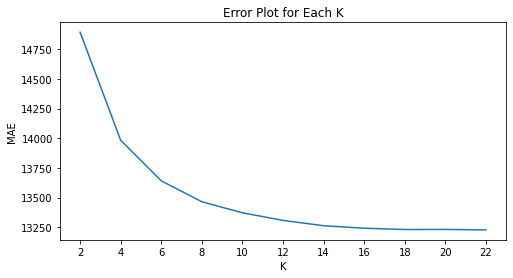

In [55]:
#plotting error

curve = pd.DataFrame(MAE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(2,24,2)), list(range(2,24,2)), rotation='horizontal')
plt.plot(list(range(2,24,2)),MAE)
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

`as we noticed the erorr does not improve after K=20 and become stable so we will use it as follow...`

In [56]:
from sklearn.neighbors import KNeighborsRegressor

KNN=KNeighborsRegressor(n_neighbors=20,weights='distance') 
KNN.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='distance')

In [57]:
y_pred=KNN.predict(X_test)

In [58]:
TellMe("KNN",Y_test,y_pred)

The Evaluation Result For --->( KNN ) is:
 * Mean absolute error = 13231.28
 * Mean squared error = 490856962.53
 * Median absolute error = 8298.31
 * Explain variance score = 0.69
 * R2 score = 0.69
 * Accuracy = 76.54 %


### 4) another powerful Model we want to applay is RandomForest Regresser

This model was used an Ensamble(group of predicters) of Decsion Tree traning useing bagging methoud and the Voting Technique so this Model may predict an Excellent Result for this problem.

its more convenient and optimized 

if you want to learn in detalis about this Techniqe so visit ---> __[RandomForestRegressor
](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)__ 

we do a Gread Search in This Model so the paramter will Tuninng very well Gread Search ScreenShoot in Documantion

In [59]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=60, max_features='auto', max_leaf_nodes=None,
                                  max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
                                  min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600, oob_score=False,
                                  random_state=100, verbose=2, warm_start=False,n_jobs=-1)
regressor.fit(X_train,Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 600building tree 2 of 600
building tree 3 of 600
building tree 4 of 600

building tree 5 of 600building tree 6 of 600building tree 7 of 600

building tree 8 of 600
building tree 9 of 600

building tree 10 of 600
building tree 11 of 600building tree 12 of 600

building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.1s


building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600
building tree 44 of 600
building tree 45 of 600
building tree 46 of 600
building tree 47 of 600
building tree 48 of 600
building tree 49 of 600
building tree 50 of 600
building tree 51 of 600
building tree 52 of 600
building tree 53 of 600
building tree 54 of 600
building tree 55 of 600
building tree 56 of 600
building tree 57 of 600
building tree 58 of 600
building tree 59 of 600
building tree 60 of 600
building tree 61 of 600
building tree 62 of 600
building tree 63 of 600
building tree 64 of 600
building tree 65 of 600
building tree 66 of 600
building tree 67 of 600
building tree 68 of 600
building tree 69 of 600
building tree 70 of 600
building tree 71

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.4min


building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 173 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 181 of 600
building tree 182 of 600
building tree 183 of 600
building tree 184 of 600
building tree 185 of 600
building tree 186 of 600
building tree 187 of 600
building tree 188 of 600
building tree 189 of 600


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  5.8min


building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 385 of 600
building tree 386 of 600
building tree 387 of 600
building tree 388 of 600
building tree 389 of 600
building tree 390 of 600
building tree 391 of 600
building tree 392 of 600
building tree 393 of 600
building tree 394 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.9min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=-1, oob_score=False,
                      random_state=100, verbose=2, warm_start=False)

In [60]:
PRF = regressor.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    4.4s finished


In [61]:
TellMe("RandomForest",Y_test,PRF)

The Evaluation Result For --->( RandomForest ) is:
 * Mean absolute error = 5355.07
 * Mean squared error = 114472350.68
 * Median absolute error = 2994.12
 * Explain variance score = 0.93
 * R2 score = 0.93
 * Accuracy = 89.61 %


### Here we will plot a Relatshionship between (Actual vs predicted value) and we will plot the Learning Curve for the Model to see its Behaviour as follow...

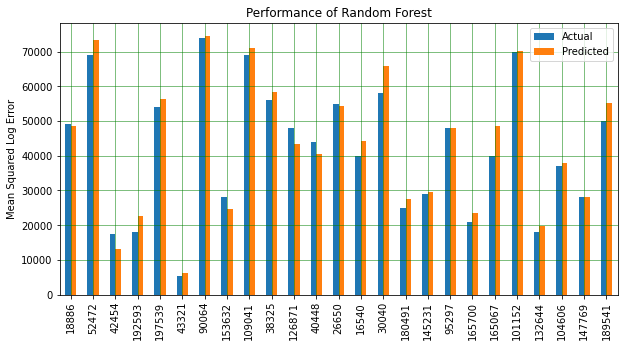

In [62]:
df_check = pd.DataFrame({'Actual': Y_test, 'Predicted': PRF})
df_check = df_check.head(25)

df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

In [ ]:
%%time
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=60, max_features='auto', max_leaf_nodes=None,
                                  max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
                                  min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=600, oob_score=False,
                                  random_state=100, verbose=2, warm_start=False,n_jobs=-1), X_train, Y_train,
                                                        train_sizes=np.linspace(0.01, 1.0, 50),n_jobs=-1,cv=10)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.subplots(1, figsize=(7,7))
plt.plot(train_sizes, train_mean, '--', color="#b52828",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#ffffff")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#ffffff")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
print("Hello")

### As we expected RandomForest was get a best Accuracy and less MAE from onther Models so we want to add some enhancment on it aiming to reduace the MAE and increse the Acuuracy 

So `we will use XGboost as an enhancment to RandomForest`

what is XGBoost(Gradient Boosted Decision Trees)??

Simply : Gradient boosting is a method that goes through cycles to iteratively add models into an ensemble, Random Forest is Consider as a Baggieng algorithm so its reduces variance. 

Boosting reduces variance, and also reduces bias. It reduces variance because you are using multiple models (bagging). It reduces bias by training the subsequent model by telling him what errors the previous models made (the boosting part).

There are two main algorithms: 

* Adaboost: this is the original algorithm; you tell subsequent models to punish more heavily observations mistaken by the previous models
* Gradient boosting: you train each subsequent model using the residuals (the difference between the predicted and true values)


Lets Start applay something Called early Stoping that tell you wheres model doesnt imporve as follow ...

In [ ]:
import xgboost as xgb

#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 60, alpha = 5, n_estimators = 600,n_jobs=-1)
xg_reg.fit(X_train,Y_train)

In [ ]:
y_pred = xg_reg.predict(X_test)

In [ ]:
TellMe("RandomForest",Y_test,y_pred)

In [ ]:
%%time
my_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05,n_jobs=-1)
my_model.fit(X_train,Y_train, early_stopping_rounds=5, 
             eval_set=[(X_test,Y_test)], verbose=False)